# Analysis of the dietitian survey responses 

In this notebook, we analyze the survey responses from the evaluation experiment

## Table of Contents

1. [Loading the data and necessary libraries](#loading-the-data-and-necessary-libraries)
2. [Initial session evaluation survey](#initial-session-evaluation-survey)
3. [Follow-up session evaluation survey](#follow-up-session-evaluation-survey)
4. [Merging recommendations with survey results](#merging-recommendations-with-survey-results)
5. [Overall average sus score and average sus score per patient](#sus-scores)
6. [Creating UTAUT2 barplots](#creating-utaut2-barplots)

## Loading the necessary libraries and data
<a class="anchor" id="loading-the-data-and-necessary-libraries"></a>

In [18]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dotenv import load_dotenv
import os
import utils

# Load data from the user database
recommendation_sessions = pd.read_csv('Data/fs_backend_db/recommendation_sessions.csv')
recommendations = pd.read_csv('Data/fs_backend_db/recommendations.csv')
users = pd.read_csv('Data/fs_backend_db/users.csv')

# Load evaluation survey responses from initial session (IS) and final session (FS)
is_survey = pd.read_excel('Data/20240829-Evaluation-Survey.xlsx')
fs_survey = pd.read_excel('Data/20240905-Evaluation-Survey.xlsx')


## Initial session evaluation survey
<a class="anchor" id="initial-session-evaluation-survey"></a>

In [19]:

cleaned_is_survey = utils.rename_evaluation_survey_columns(is_survey, is_initial_session=True)
cleaned_is_survey = utils.map_likert_to_numbers(cleaned_is_survey, is_initial_session=True)
cleaned_is_survey = utils.calculate_aggregated_metrics(cleaned_is_survey)


In [20]:
rel_cols = [ 'age', 'gender', 'years_of_experience', 'software_usage', 'sus', 'performance_expentancy', 
                                          'effort_expentancy','facilitating_conditions', 'behavioral_intention','hedonic_motivation'] #cleaned_is_survey
cleaned_is_survey[rel_cols].describe()

,age,years_of_experience,software_usage,sus,performance_expentancy,effort_expentancy,facilitating_conditions,behavioral_intention,hedonic_motivation
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,31.727273,7.000000,4.000000,72.272727,3.939394,5.340909,5.060606,4.484848,5.545455
std,8.989893,8.473488,1.341641,12.720778,1.123666,0.726918,0.892166,0.911210,0.402015
min,25.000000,1.000000,2.000000,55.000000,2.000000,4.500000,4.000000,3.000000,5.000000
25%,25.500000,1.000000,3.000000,62.500000,3.000000,4.750000,4.500000,4.000000,5.333333
50%,26.000000,2.000000,5.000000,72.500000,4.000000,5.250000,5.000000,4.000000,5.333333
75%,36.500000,11.000000,5.000000,80.000000,4.666667,5.625000,5.333333,5.333333,6.000000
max,50.000000,27.000000,5.000000,92.500000,5.333333,7.000000,7.000000,6.000000,6.000000


# Follow-up session svaluation survey
<a class="anchor" id="follow-up-session-evaluation-survey"></a>

In [21]:

cleaned_fs_survey = utils.rename_evaluation_survey_columns(fs_survey, is_initial_session = False)
cleaned_fs_survey = utils.map_likert_to_numbers(cleaned_fs_survey, is_initial_session = False)
cleaned_fs_survey = utils.calculate_aggregated_metrics(cleaned_fs_survey)


In [22]:
rel_cols = [ 'age', 'gender', 'years_of_experience', 'software_usage', 'sus', 'performance_expentancy', 
                                          'effort_expentancy','facilitating_conditions', 'behavioral_intention','hedonic_motivation'] #cleaned_is_survey
cleaned_fs_survey[rel_cols].describe()

,age,years_of_experience,software_usage,sus,performance_expentancy,effort_expentancy,facilitating_conditions,behavioral_intention,hedonic_motivation
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,30.916667,6.541667,4.083333,67.083333,3.305556,5.625000,4.861111,3.361111,4.722222
std,8.732992,8.032486,1.311372,11.571582,1.290668,0.361499,0.989422,1.500561,1.126659
min,24.000000,1.000000,2.000000,52.500000,1.333333,4.750000,3.000000,1.000000,2.000000
25%,25.000000,1.375000,3.500000,56.875000,2.250000,5.500000,4.333333,2.500000,4.000000
50%,26.000000,2.500000,5.000000,67.500000,3.333333,5.500000,5.166667,3.500000,4.833333
75%,32.750000,7.500000,5.000000,70.625000,4.666667,6.000000,5.333333,4.000000,5.416667
max,50.000000,27.000000,5.000000,92.500000,5.333333,6.000000,6.333333,6.000000,6.000000


In [23]:
other_columns_results =  cleaned_fs_survey[['increase_patient_food_understanding',
                     'improve_nutrition_care_quality',
                     'better_achieve_health_outcomes',
                     'perc_patients_can_benefit',
                     'multi_person_household', 
                     'required_use_of_customer_card',
                     'fpd_only',
                     'migros_coop_only',
                     'medical_diagnosis',
                     'client_demographics',
                     'insurance_coverage',
                     'valuable_compared_to_other_tools',
                     'promote_cost_savings',
                     'price_per_patient_per_month']]

other_columns_results.describe()

,increase_patient_food_understanding,improve_nutrition_care_quality,better_achieve_health_outcomes,perc_patients_can_benefit,multi_person_household,required_use_of_customer_card,fpd_only,migros_coop_only,medical_diagnosis,client_demographics,insurance_coverage,valuable_compared_to_other_tools,promote_cost_savings,price_per_patient_per_month
count,12.000000,12.000000,12.000000,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.0
mean,3.416667,3.083333,2.916667,NaN,4.500000,4.166667,4.333333,4.333333,2.916667,2.916667,2.166667,2.333333,2.333333,NaN
std,0.900337,0.668558,0.900337,NaN,0.904534,1.114641,0.887625,0.984732,0.792961,1.083625,0.834847,0.984732,0.984732,NaN
min,2.000000,2.000000,2.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,NaN
25%,2.750000,3.000000,2.000000,NaN,4.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.750000,1.750000,NaN
50%,4.000000,3.000000,3.000000,NaN,5.000000,5.000000,4.500000,5.000000,3.000000,3.000000,2.000000,2.500000,2.500000,NaN
75%,4.000000,3.250000,4.000000,NaN,5.000000,5.000000,5.000000,5.000000,3.250000,3.000000,2.250000,3.000000,3.000000,NaN
max,4.000000,4.000000,4.000000,NaN,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,NaN


# Merging recommendations with survey results
<a class="anchor" id="merging-recommendations-with-survey-results"></a>

In [24]:
#Rename columns to prepare for the merge
rel_users_cols = ['id', 'email','type','register_time']
rel_users = users[rel_users_cols]
rel_users = rel_users.rename(columns={'id':'dietician_id'})

recommendations = recommendations.rename(columns={'id':'recommendation_id'})

recommendation_sessions = recommendation_sessions.rename(columns={'id':'session_id'})

# Merge data from the user database
all_data = rel_users.merge(recommendation_sessions, on='dietician_id', how = 'left').merge(recommendations, on='session_id', how = 'left')


# get the initial dieititan emails from the evaluation survey responses
is_emails = cleaned_is_survey['email']
fs_emails = cleaned_fs_survey['email']

unique_is_emails = cleaned_is_survey['email'].unique()
unique_fs_emails = cleaned_fs_survey['email'].unique()

# There are two same emails
print(f"""
There are {len(is_emails)} emails ({len(unique_is_emails)} unique) in the initial session survey responses.
There are {len(fs_emails)} emails ({len(unique_fs_emails)} unique) in the final session survey responses.
""")    


There are 11 emails (11 unique) in the initial session survey responses.
There are 12 emails (11 unique) in the final session survey responses.



In [25]:
#get initial session data from the user database
is_data = all_data[all_data['email'].isin(is_emails)]
is_data = is_data.drop_duplicates(subset=['email', 'session_id'])
is_dietitians_patients = is_data[['email', 'user_id']]

#get follow-up session data from the user database
fs_data = all_data[all_data['email'].isin(fs_emails)]
fs_data = fs_data.drop_duplicates(subset=['email', 'session_id'])
fs_dietitians_patients = fs_data[['email', 'user_id']]

# merge the survey responses with the dietitian-patient data, i.e., which dietitians are giving recommendations to which patients
complete_is_data = cleaned_is_survey.merge(is_dietitians_patients, on='email', how='inner')
complete_fs_data = cleaned_fs_survey.merge(fs_dietitians_patients, on='email', how='inner')

utaut2_cols = ['performance_expentancy',
       'effort_expentancy', 'facilitating_conditions', 'behavioral_intention',
       'hedonic_motivation', 'user_id']

utaut2_is_data = complete_is_data[utaut2_cols]
utaut2_fs_data = complete_fs_data[utaut2_cols]

### Overall average sus score and average sus score per patient
<a class="anchor" id="sus-scores"></a>

In [26]:
# Overall average sus score in the initial session
# Need to remove duplicates because some dietitians gave their patient several recommendations
complete_fs_data.drop_duplicates()['sus'].describe()

count    11.000000
mean     66.590909
std      12.003787
min      52.500000
25%      56.250000
50%      65.000000
75%      70.000000
max      92.500000
Name: sus, dtype: float64

In [27]:
# Average sus score per patient in the initial session
complete_fs_data.drop_duplicates().groupby('user_id')['sus'].describe()

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
1.0,2.0,55.000,0.000000,55.0,55.000,55.0,55.0,55.0
2.0,4.0,66.875,11.433686,52.5,61.875,67.5,72.5,80.0
3.0,5.0,71.000,13.062350,57.5,65.000,70.0,70.0,92.5


In [28]:
# Overall average sus score in the follow-up session
complete_is_data.drop_duplicates()['sus'].describe()

count    10.000000
mean     72.250000
std      13.408641
min      55.000000
25%      61.250000
50%      71.250000
75%      82.500000
max      92.500000
Name: sus, dtype: float64

In [29]:
# Overall average sus score per patient in the follow-up session
complete_is_data.drop_duplicates().groupby('user_id')['sus'].describe()

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
1.0,2.0,75.000000,21.213203,60.0,67.50,75.0,82.50,90.0
2.0,3.0,70.833333,15.069284,55.0,63.75,72.5,78.75,85.0
3.0,5.0,72.000000,13.157697,57.5,65.00,70.0,75.00,92.5


### Creating UTAUT2 barplots
<a class="anchor" id="creating-utaut2-barplots"></a>

**Creating a UTAUT2 barplot, differentiating the initial session and the follow-up session**

In [30]:
cleaned_is_survey[['performance_expentancy',
       'effort_expentancy', 'facilitating_conditions', 
       'hedonic_motivation', 'behavioral_intention']].mean()

performance_expentancy     3.939394
effort_expentancy          5.340909
facilitating_conditions    5.060606
hedonic_motivation         5.545455
behavioral_intention       4.484848
dtype: float64

In [31]:
# Creating 
utaut2_cols = ['performance_expentancy',
       'effort_expentancy', 'facilitating_conditions', 
       'hedonic_motivation', 'behavioral_intention']
is_utaut2_means = cleaned_is_survey[utaut2_cols].mean()
is_utaut2_sd = cleaned_is_survey[utaut2_cols].std()

fs_utaut2_means = cleaned_fs_survey[utaut2_cols].mean()
fs_utaut2_sd = cleaned_fs_survey[utaut2_cols].std()

bar_width = 0.3  

positions = np.arange(len(is_utaut2_means)) 
x_tick_labels = ["Performance\n Expentancy", "Effort\n Expentancy", "Facilitating\n Conditions", "Hedonic\n Motivation", "Behavioral\n Intention"]


Text(0, 0.5, 'Rating on a 7-point Likert scale')

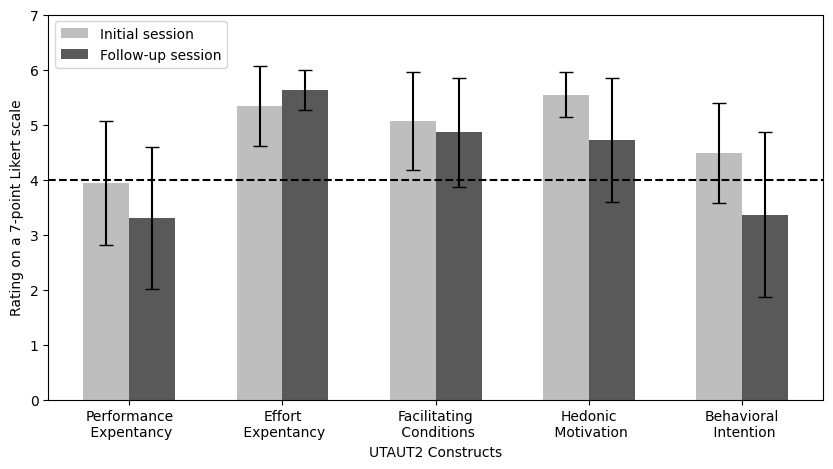

In [32]:
#Create a bar plot of the overll UTAUT2 constructs

overall_utaut2_fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# sns.histplot(cleaned_is_survey['sus'], ax=ax, color='blue', label='IS Survey')
ax.bar(positions -0.15, is_utaut2_means.values, yerr=is_utaut2_sd.values, width=bar_width, capsize=5, color='#BEBEBE', label = "Initial session")
ax.bar(positions +0.15, fs_utaut2_means.values, yerr=fs_utaut2_sd.values, width=bar_width, capsize=5, color='#595959', label = "Follow-up session")
ax.axhline(y=4, color='black', linestyle='--')
ax.set_xticks(positions)
ax.set_xticklabels(x_tick_labels)
ax.legend(loc = 'upper left')
plt.ylim(0, 7)
plt.xlabel("UTAUT2 Constructs")
plt.ylabel("Rating on a 7-point Likert scale")


**Creating a UTAUT2 barplot, differentiating the three patients and two sessions**

In [33]:
# Create arrays of means and SDs for plotting
is_df_means = utaut2_is_data.drop_duplicates().groupby('user_id').mean()
is_df_sd = utaut2_is_data.drop_duplicates().groupby('user_id').std()

fs_df_means = utaut2_fs_data.drop_duplicates().groupby('user_id').mean()
fs_df_sd = utaut2_fs_data.drop_duplicates().groupby('user_id').std()

Text(0, 0.5, 'Rating on a 7-point Likert scale')

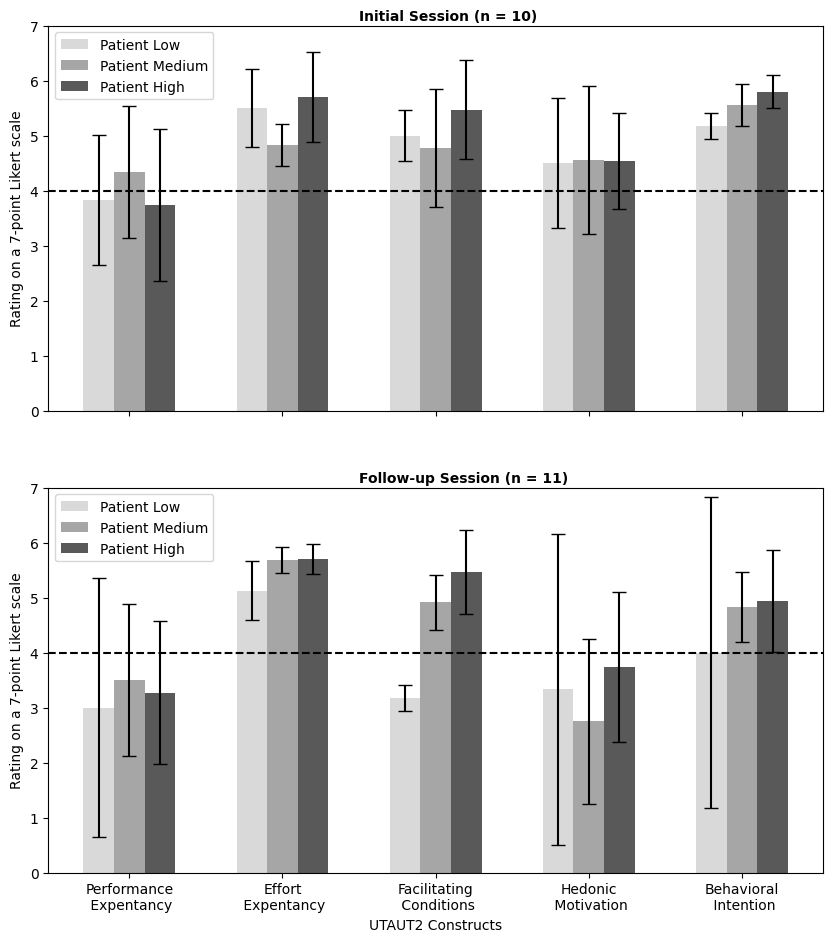

In [34]:
# Create a bar plot of the UTAUT2 constructs per patient
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 11), sharex=True, sharey=True)

positions = np.arange(5) 
bar_width = 0.2
x_tick_labels = ["Performance\n Expentancy", "Effort\n Expentancy", "Facilitating\n Conditions", "Hedonic\n Motivation", "Behavioral\n Intention"]

# sns.histplot(cleaned_is_survey['sus'], ax=ax, color='blue', label='IS Survey')
ax1.bar(positions -0.2, is_df_means.loc[1], yerr=is_df_sd.loc[1], width=bar_width, capsize=5, color='#D9D9D9', label = "Patient Low")
ax1.bar(positions, is_df_means.loc[2], yerr=is_df_sd.loc[2], width=bar_width, capsize=5, color='#A6A6A6', label = "Patient Medium")
ax1.bar(positions +0.2, is_df_means.loc[3], yerr=is_df_sd.loc[3], width=bar_width, capsize=5, color='#595959', label = "Patient High")
ax1.axhline(y=4, color='black', linestyle='--')
ax1.set_xticks(positions)
ax1.set_xticklabels(x_tick_labels)
ax1.legend(loc = 'upper left')
ax1.text(1.5, 7.1, "Initial Session (n = 10)", fontweight='bold')
# ax1.set_xlabel("UTAUT2 Constructs")
ax1.set_ylabel("Rating on a 7-point Likert scale")
# sns.histplot(cleaned_is_survey['sus'], ax=ax, color='blue', label='IS Survey')
ax2.bar(positions -0.2, fs_df_means.loc[1], yerr=fs_df_sd.loc[1], width=bar_width, capsize=5, color='#D9D9D9', label = "Patient Low")
ax2.bar(positions, fs_df_means.loc[2], yerr=fs_df_sd.loc[2], width=bar_width, capsize=5, color='#A6A6A6', label = "Patient Medium")
ax2.bar(positions +0.2, fs_df_means.loc[3], yerr=fs_df_sd.loc[3], width=bar_width, capsize=5, color='#595959', label = "Patient High")
ax2.axhline(y=4, color='black', linestyle='--')
ax2.set_xticks(positions)
ax2.set_xticklabels(x_tick_labels)
ax2.legend(loc = 'upper left')
ax2.text(1.5, 7.1, "Follow-up Session (n = 11)", fontweight='bold')

plt.ylim(0, 7)
ax2.set_xlabel("UTAUT2 Constructs")
ax2.set_ylabel("Rating on a 7-point Likert scale")